In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("udemy course.csv",sep=';')

In [3]:
df.head()

,course_id,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
0,8082,Ruby Programming for Beginners,28445,643,56,6.0,21/08/2019 00:00,08/07/2011 21:32,14/06/2011 16:09,1050000,182000.0,All Levels,Ruby
1,8203,Basic and Advanced HTML Lessons,1550,12,15,1.0,10/07/2017 00:00,20/06/2011 17:48,20/06/2011 19:59,350000,182000.0,All Levels,HTML
2,8319,Git Basics: In Theory and Practice,291,12,31,7.5,NaN,29/07/2011 20:24,28/06/2011 04:48,280000,182000.0,All Levels,Git
3,8324,Javascript for Beginners,3840,258,48,3.0,16/07/2019 00:00,09/07/2011 05:43,28/06/2011 08:26,280000,182000.0,All Levels,JavaScript
4,8325,HTML Tutorial: HTML & CSS for Beginners,12521,297,82,4.0,16/07/2019 00:00,09/09/2011 15:28,28/06/2011 08:27,280000,182000.0,All Levels,HTML


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9243 entries, 0 to 9242
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   course_id       9243 non-null   int64  
 1   course_name     9243 non-null   object 
 2   subs            9243 non-null   int64  
 3   num_reviews     9243 non-null   int64  
 4   num_lectures    9243 non-null   int64  
 5   duration        9243 non-null   float64
 6   last_update     9218 non-null   object 
 7   publish_date    9243 non-null   object 
 8   created_date    9243 non-null   object 
 9   original_price  9243 non-null   int64  
 10  discount_price  9063 non-null   float64
 11  level           9239 non-null   object 
 12  label           9233 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 938.9+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
course_id,9243.0,1.306329e+06,647018.680077,8082.00,810231.0,1325584.0,1803198.0,2547807.0
subs,9243.0,4.454148e+03,16161.016859,1.00,163.0,957.0,3303.0,685057.0
num_reviews,9243.0,4.057966e+02,3414.170145,1.00,11.0,34.0,126.0,186085.0
num_lectures,9243.0,5.737910e+01,66.939405,4.00,21.0,36.0,66.0,779.0
duration,9243.0,6.831581e+00,11.266772,0.37,2.0,3.5,7.5,356.0
original_price,9243.0,1.422167e+06,965609.585313,280000.00,420000.0,1400000.0,2590000.0,2800000.0
discount_price,9063.0,1.838769e+05,27062.320440,182000.00,182000.0,182000.0,182000.0,700000.0


### To do list

#### Part 1: Data Prep 

#### Part2 : EDA of dataset
find out best Python course

#### Part 3: Cluster based on course Title,
wordlouds of clusters

#### Part 4: Merge reviews and summarize reviews for each course



### Part 1: Data Preparation

In [31]:
df.isnull().sum()

course_id           0
course_name         0
subs                0
num_reviews         0
num_lectures        0
duration            0
last_update        25
publish_date        0
created_date        0
original_price      0
discount_price    180
level               4
label              10
dtype: int64

In [6]:
df["last_update"]= df["last_update"].fillna(df["publish_date"])

In [7]:
df["discount_price"]= df["discount_price"].fillna(df["discount_price"].mean())

In [8]:
df["level"] = df["level"].fillna("All Levels")

In [9]:
df["label"] = df["label"].fillna("None")

In [10]:
df.isnull().sum()

course_id         0
course_name       0
subs              0
num_reviews       0
num_lectures      0
duration          0
last_update       0
publish_date      0
created_date      0
original_price    0
discount_price    0
level             0
label             0
dtype: int64

## Part 2: EDA 

<AxesSubplot:xlabel='level', ylabel='count'>

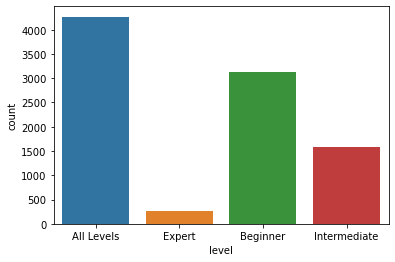

In [37]:
sns.countplot(data=df, x="level")

(0.0, 15000.0)

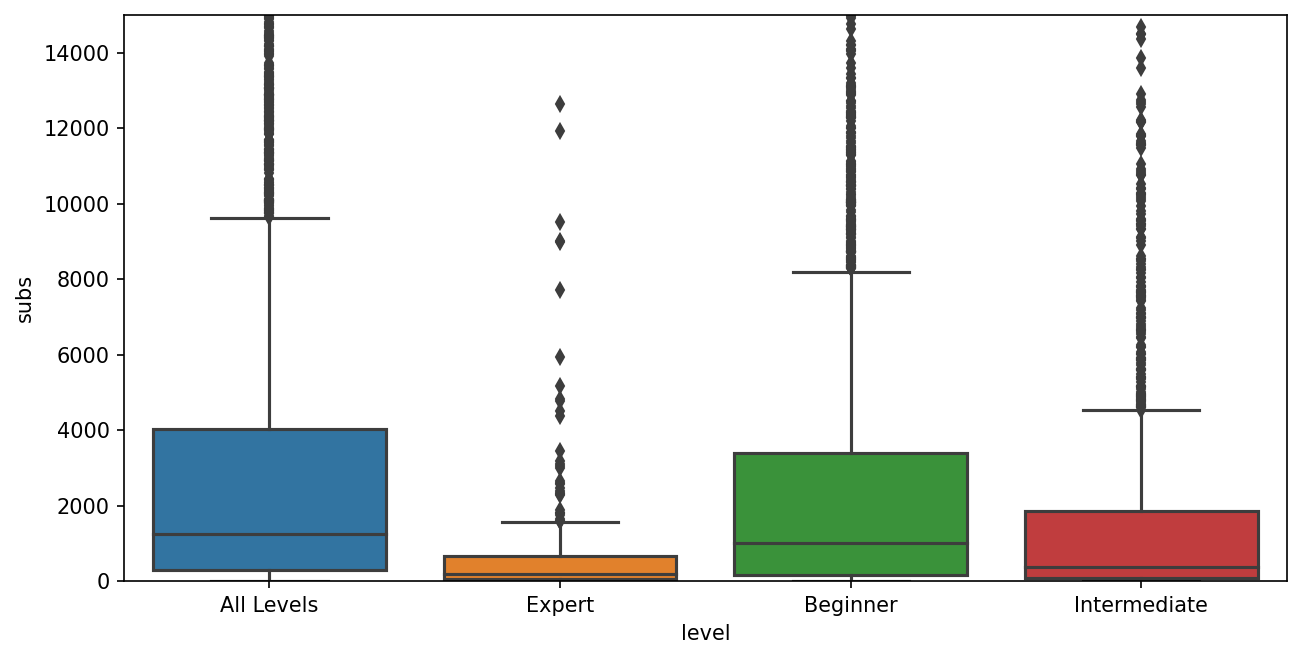

In [52]:
plt.figure(figsize=(10,5),dpi=150)
sns.boxplot(data=df,x="level",y="subs")
plt.ylim(0,15000)

<AxesSubplot:xlabel='duration', ylabel='Count'>

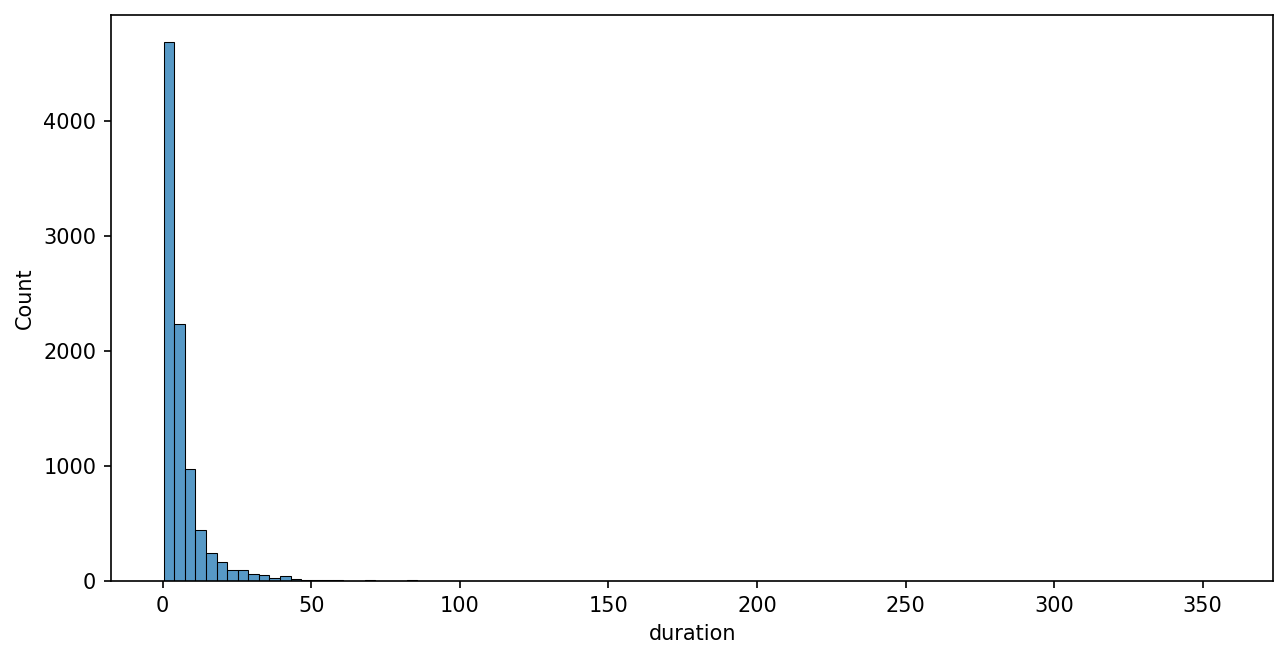

In [174]:
plt.figure(figsize=(10,5),dpi=150)
sns.histplot(data=df,x="duration",bins=100)

### Are longer courses more expensive?

<AxesSubplot:xlabel='duration', ylabel='original_price'>

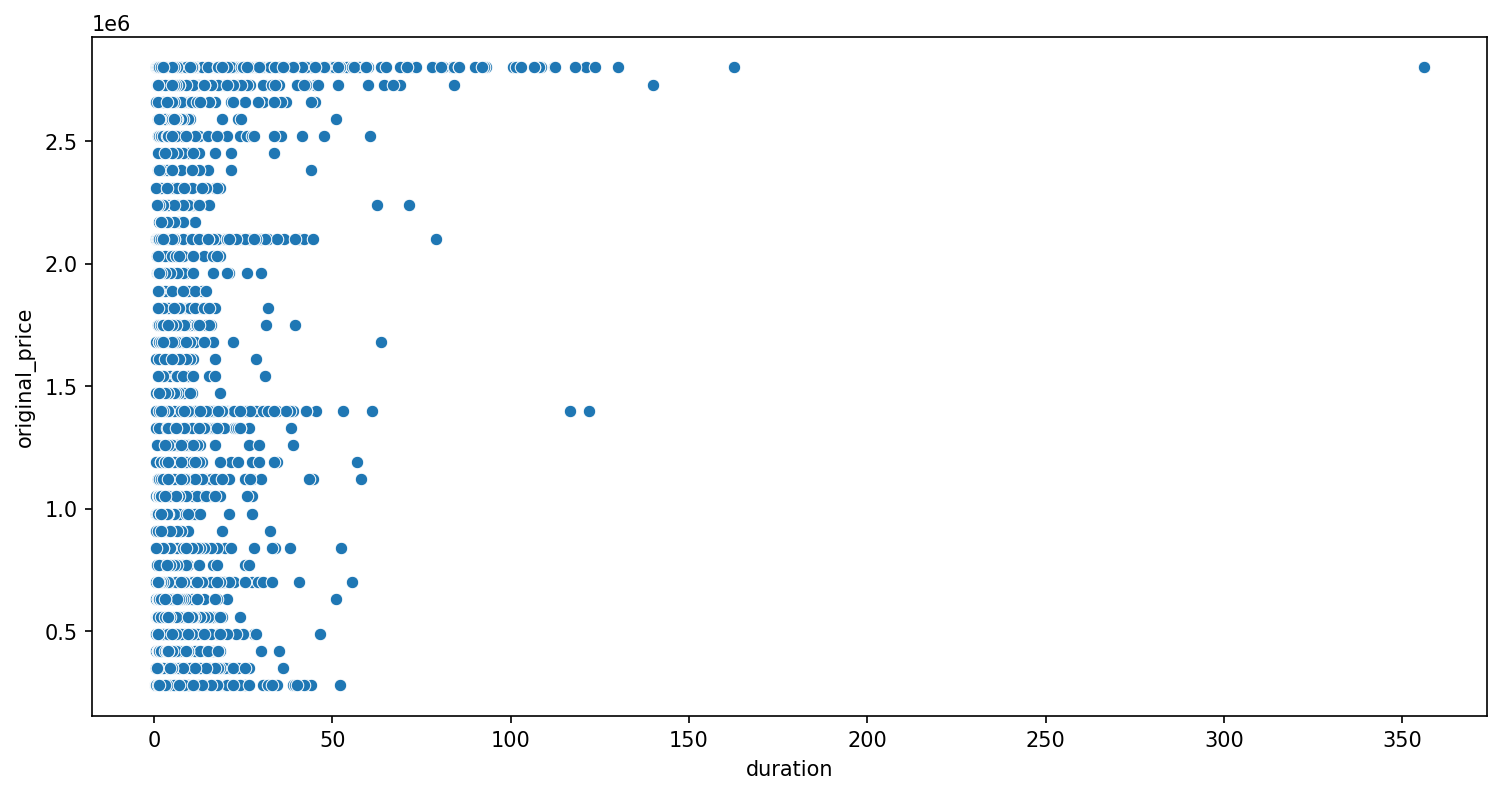

In [47]:
plt.figure(figsize=(12,6),dpi=150)
sns.scatterplot(data=df,x="duration",y="original_price")

we see no clear relationship between course duration and price however 50 is seem to be the threshold. Courses that endures more than 50 hours are usually more expensive. Courses last under 50 hour can be either expensive or cheap

### Are longer courses have more students enrolled?

<AxesSubplot:xlabel='duration', ylabel='subs'>

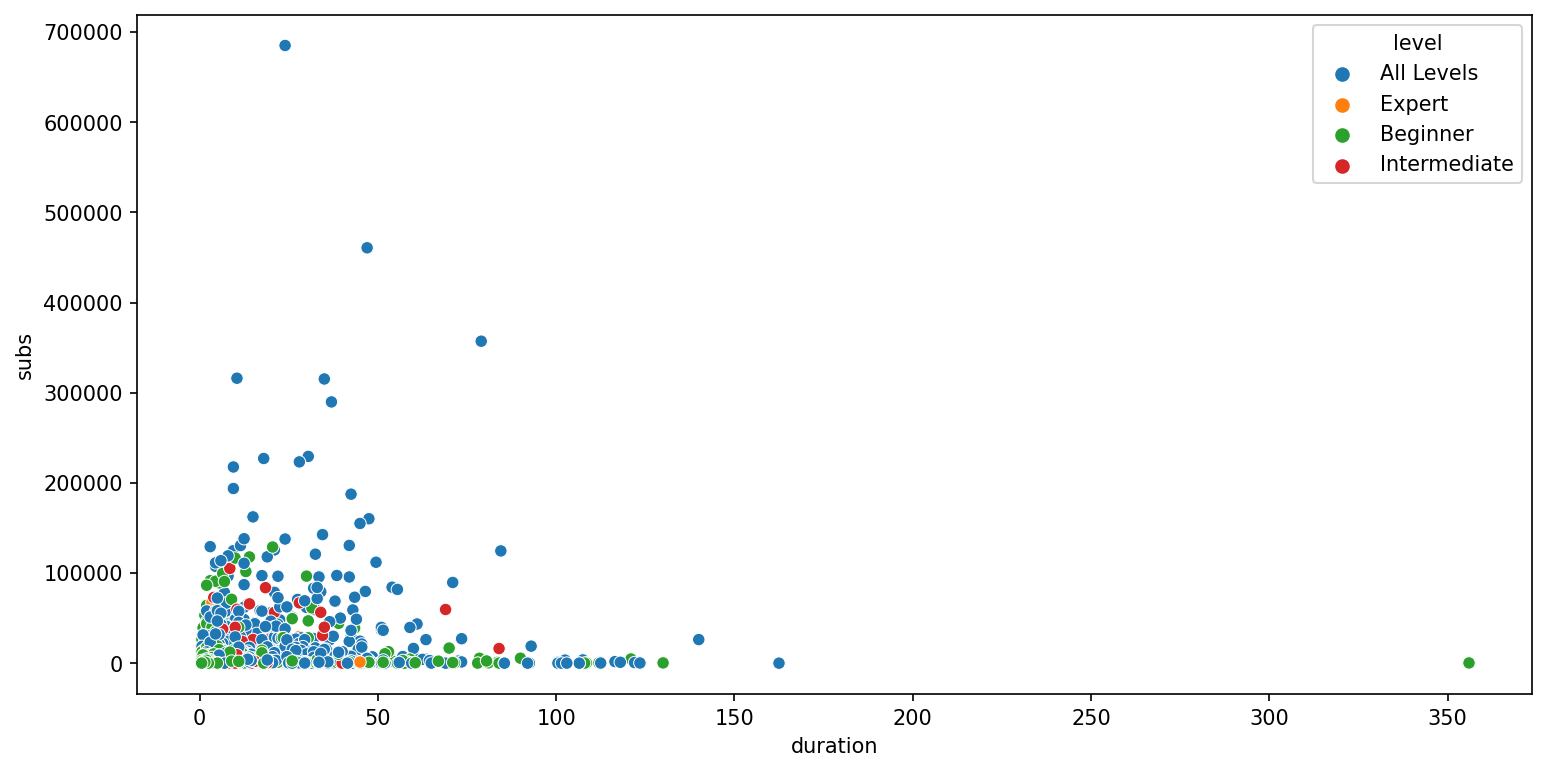

In [53]:
plt.figure(figsize=(12,6),dpi=150)
sns.scatterplot(data=df,x="duration",y="subs",hue="level")

### Are longer courses have more lectures?

<AxesSubplot:xlabel='duration', ylabel='num_lectures'>

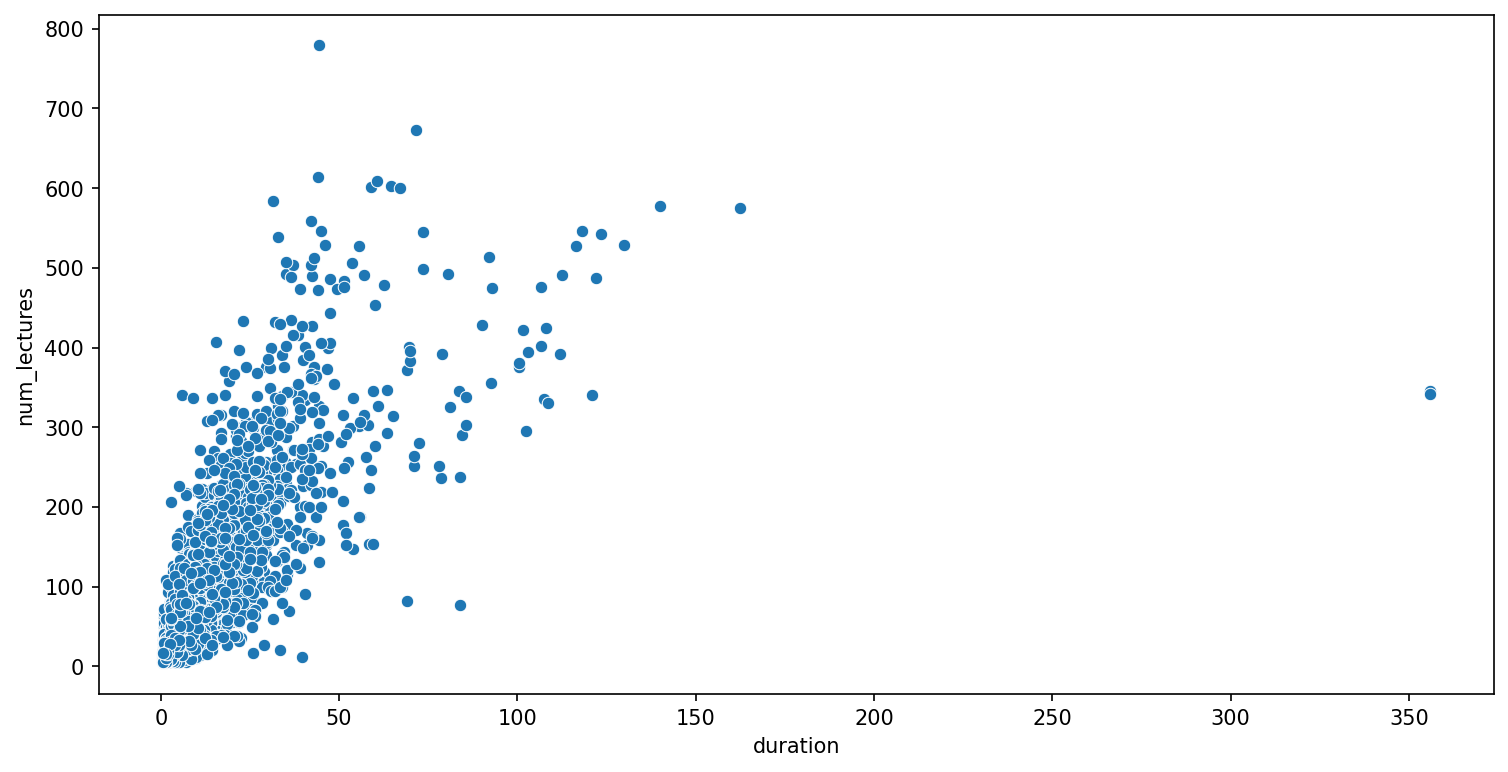

In [120]:
plt.figure(figsize=(12,6),dpi=150)
sns.scatterplot(data=df,x="duration",y="num_lectures")

### Top 10 course based on number of students enrolled 

<AxesSubplot:xlabel='subs', ylabel='course_name'>

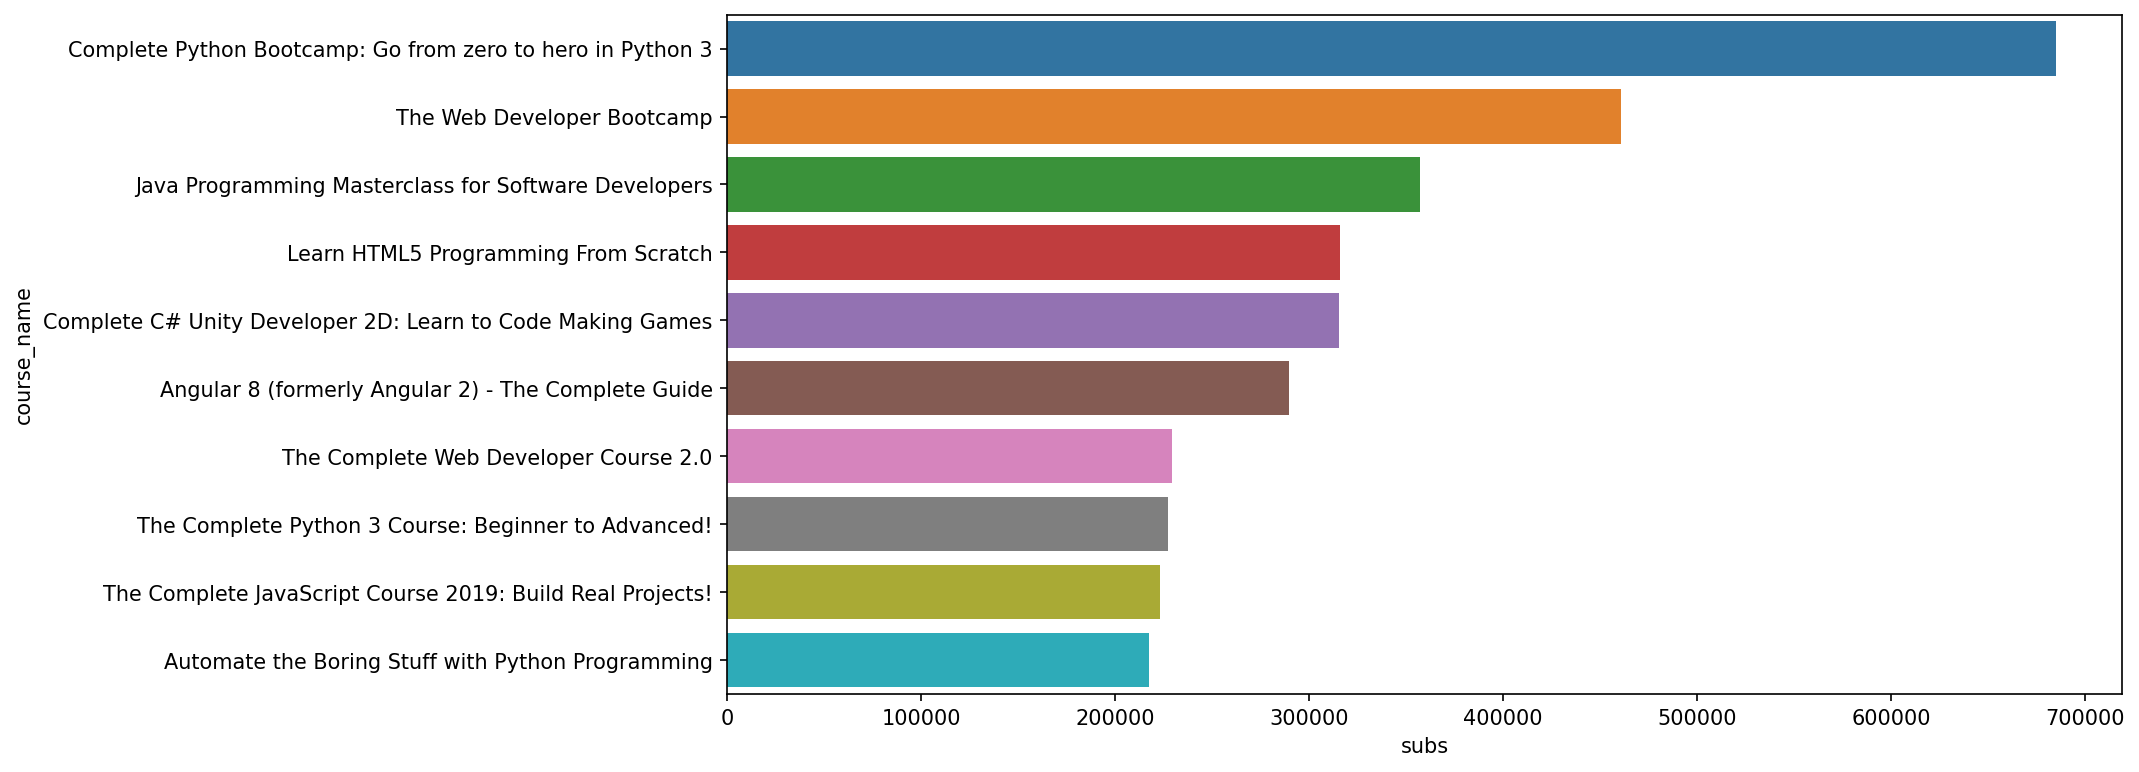

In [55]:
plt.figure(figsize=(12,6),dpi=150)
sns.barplot(data=df.sort_values(by=["subs"],ascending=False).head(n=10),x="subs",y="course_name")

### Top 10 course for Python

In [11]:
python = df[df["course_name"].str.contains("Python",case=True,regex=True)==True]
python.sort_values(by=["subs"],ascending=False).head(n=10)[["course_name","subs"]]

,course_name,subs
1447,Complete Python Bootcamp: Go from zero to hero...,685057
2571,The Complete Python 3 Course: Beginner to Adva...,227017
1355,Automate the Boring Stuff with Python Programming,217612
2175,30 Days of Python | Unlock your Python Potential,193735
1896,The Python Mega Course: Build 10 Real World Ap...,137716
1646,Learn Python Programming Masterclass,130623
933,Learning Python for Data Analysis and Visualiz...,125657
2856,The Complete Python 3 Course: Go from Beginner...,119065
2784,Data Analysis with Pandas and Python,117977
6434,"Python Programming Bible | Networking, GUI, Em...",113700


## Part 3: Course titles clustering 

In [12]:
X = df["course_name"]

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf = TfidfVectorizer()

In [15]:
X = tfidf.fit_transform(X)

In [16]:
from sklearn.cluster import KMeans

In [17]:
ssd =[]

for k in range(2,15):
    
    model = KMeans(n_clusters=k)
    model.fit(X)
    
    ssd.append(model.inertia_)

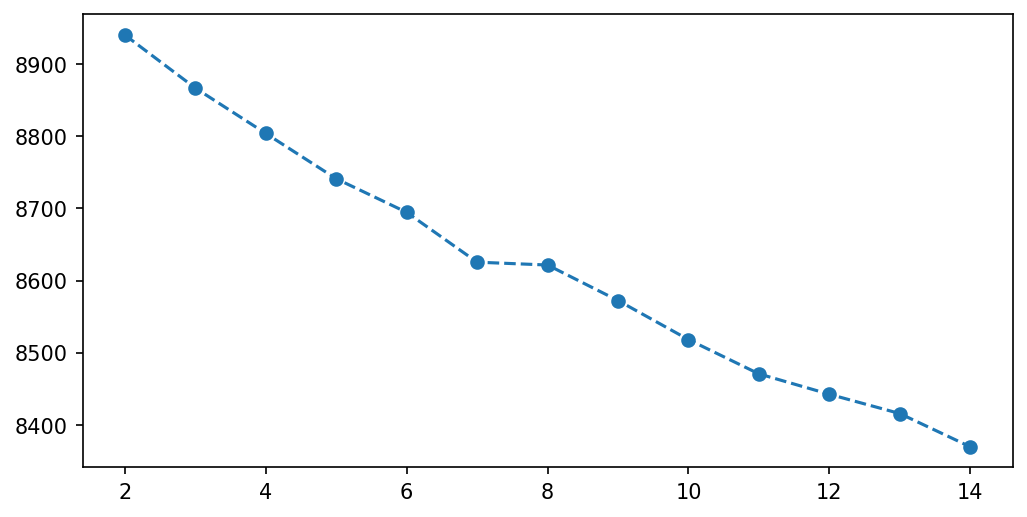

In [18]:
plt.figure(figsize=(8,4),dpi=150)
plt.plot(range(2,15),ssd,"--o")

I am gonna choose k=7

In [41]:
model = KMeans(n_clusters=7)

In [42]:
cluster = pd.Series(model.fit_predict(X))

In [43]:
data = pd.concat([df["course_name"],cluster],axis=1)

In [44]:
data.columns = ["course_name","cluster"]

### 10 most popular terms for the first label

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer(stop_words="english",ngram_range=(1,2))

In [47]:
matrix_cluster0 = cv.fit_transform(data[data["cluster"]==0]["course_name"])

In [48]:
top_terms_cluster0 = zip(cv.get_feature_names(), matrix_cluster0.sum(axis=0).tolist()[0]) 
top_terms_cluster0 = sorted(top_terms_cluster0, key=lambda x: -x[1])[:10]



In [49]:
top_terms_cluster0

[('beginners', 739),
 ('programming', 128),
 ('learn', 112),
 ('absolute', 90),
 ('absolute beginners', 86),
 ('javascript', 85),
 ('java', 68),
 ('course', 66),
 ('programming beginners', 66),
 ('complete', 52)]

### Create wordclouds for all clusters 

In [28]:
from wordcloud import WordCloud

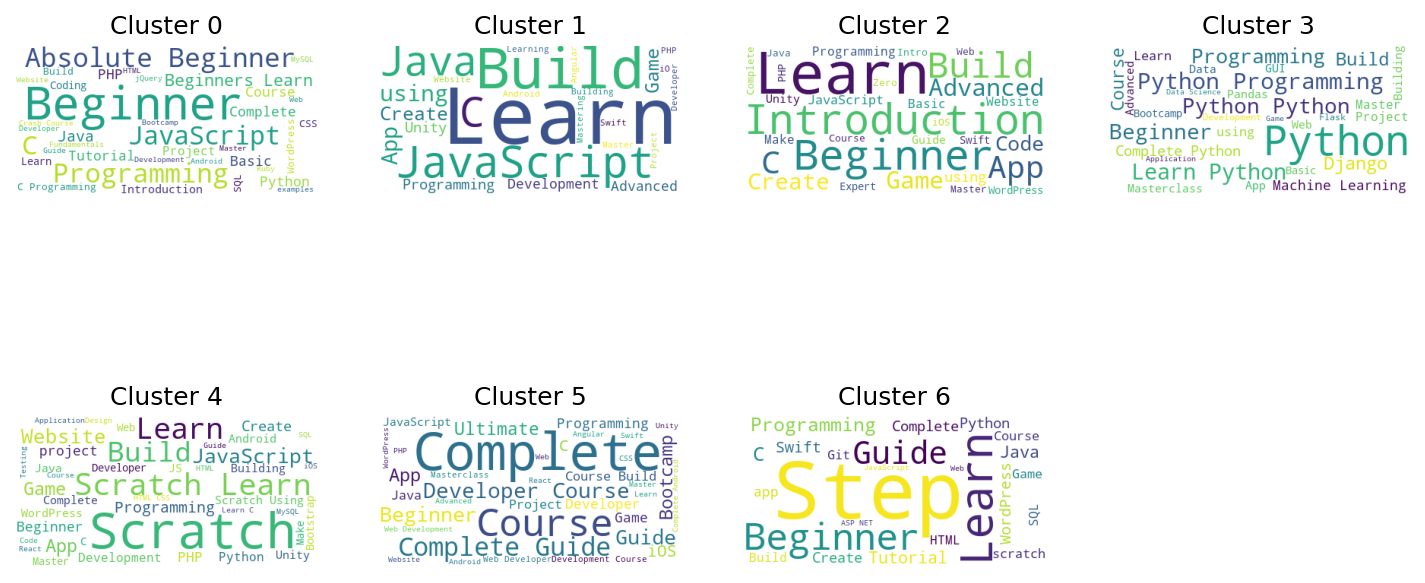

In [51]:
fig = plt.figure(figsize=(12,6),dpi=150)
for k in range(0,7):
    wordcloud = WordCloud(
                background_color ='white',
                min_font_size =10).generate(data[data["cluster"]==k]["course_name"].str.cat(sep=" "))
 
    # plot the WordCloud image
    
    ax = fig.add_subplot(2,4,k+1)
    ax.set_title("Cluster " +str(k))
    ax.imshow(wordcloud)
    ax.axis('off')



## Part 4: Review Analysis and Review summarization

In [7]:
reviews = pd.read_csv("udemy review.csv",sep=";")

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488758 entries, 0 to 488757
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   course_id       488758 non-null  int64  
 1   rating          488758 non-null  float64
 2   review_content  488678 non-null  object 
 3   date            488758 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 14.9+ MB


In [5]:
reviews.head()

,course_id,rating,review_content,date
0,8082,4.5,Delivers more than expected. Thank you!,29/07/2019 11:19
1,8082,2.5,This course would be a good choice if 1) you a...,22/06/2019 11:25
2,8082,5.0,I am new to Ruby but have programmed in Python...,14/01/2019 12:40
3,8082,4.0,The instructor has provided quite a lot of inf...,04/12/2018 08:03
4,8082,5.0,"Hare Kṛṣṇa, Hare Kṛṣṇa, Kṛṣṇa Kṛṣṇa, Hare Hare...",16/11/2018 19:12


In [8]:
avg_rating = round(reviews.groupby("course_id")["rating"].mean(),1)

In [134]:
avg_rating

course_id
8082       4.4
8203       4.0
8319       3.1
8324       4.1
8325       4.5
          ... 
2538060    4.2
2538226    3.0
2541578    3.5
2544521    5.0
2545909    2.0
Name: rating, Length: 8710, dtype: float64

In [9]:
review_content = reviews.groupby("course_id")["review_content"].apply(lambda x: ' '.join(map(str, x)).replace("\n",""))

In [28]:
review_content

course_id
8082       Delivers more than expected. Thank you! This c...
8203       This Course has been thoroughly done, i having...
8319       Easy to follow, gave me a great hands-on worki...
8324       Course for people with no programming skills. ...
8325       Practical, yet friendly and approachable. Very...
                                 ...                        
2538060    explanation is needed with some examples is be...
2538226    Provided additional details about SwiftUI. Thi...
2541578    I think it would have been good if you cover t...
2544521    This course is totally above my expectation wh...
2545909                      Background Noise Too Disturbing
Name: review_content, Length: 8710, dtype: object

In [10]:
review_data = pd.concat([avg_rating,review_content],axis=1)

In [11]:
review_data.reset_index(inplace=True)

In [33]:
review_data

,course_id,rating,review_content
0,8082,4.4,Delivers more than expected. Thank you! This c...
1,8203,4.0,"This Course has been thoroughly done, i having..."
2,8319,3.1,"Easy to follow, gave me a great hands-on worki..."
3,8324,4.1,Course for people with no programming skills. ...
4,8325,4.5,"Practical, yet friendly and approachable. Very..."
...,...,...,...
8705,2538060,4.2,explanation is needed with some examples is be...
8706,2538226,3.0,Provided additional details about SwiftUI. Thi...
8707,2541578,3.5,I think it would have been good if you cover t...
8708,2544521,5.0,This course is totally above my expectation wh...


### Merge review data with main dataset 

In [12]:
data = pd.merge(df,review_data,how="inner",on="course_id")

In [49]:
data.head()

,course_id,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label,rating,review_content
0,8082,Ruby Programming for Beginners,28445,643,56,6.0,21/08/2019 00:00,08/07/2011 21:32,14/06/2011 16:09,1050000,182000.0,All Levels,Ruby,4.4,Delivers more than expected. Thank you! This c...
1,8203,Basic and Advanced HTML Lessons,1550,12,15,1.0,10/07/2017 00:00,20/06/2011 17:48,20/06/2011 19:59,350000,182000.0,All Levels,HTML,4.0,"This Course has been thoroughly done, i having..."
2,8319,Git Basics: In Theory and Practice,291,12,31,7.5,NaN,29/07/2011 20:24,28/06/2011 04:48,280000,182000.0,All Levels,Git,3.1,"Easy to follow, gave me a great hands-on worki..."
3,8324,Javascript for Beginners,3840,258,48,3.0,16/07/2019 00:00,09/07/2011 05:43,28/06/2011 08:26,280000,182000.0,All Levels,JavaScript,4.1,Course for people with no programming skills. ...
4,8325,HTML Tutorial: HTML & CSS for Beginners,12521,297,82,4.0,16/07/2019 00:00,09/09/2011 15:28,28/06/2011 08:27,280000,182000.0,All Levels,HTML,4.5,"Practical, yet friendly and approachable. Very..."


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8710 entries, 0 to 8709
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   course_id       8710 non-null   int64  
 1   course_name     8710 non-null   object 
 2   subs            8710 non-null   int64  
 3   num_reviews     8710 non-null   int64  
 4   num_lectures    8710 non-null   int64  
 5   duration        8710 non-null   float64
 6   last_update     8686 non-null   object 
 7   publish_date    8710 non-null   object 
 8   created_date    8710 non-null   object 
 9   original_price  8710 non-null   int64  
 10  discount_price  8547 non-null   float64
 11  level           8707 non-null   object 
 12  label           8700 non-null   object 
 13  rating          8710 non-null   float64
 14  review_content  8710 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 1.1+ MB


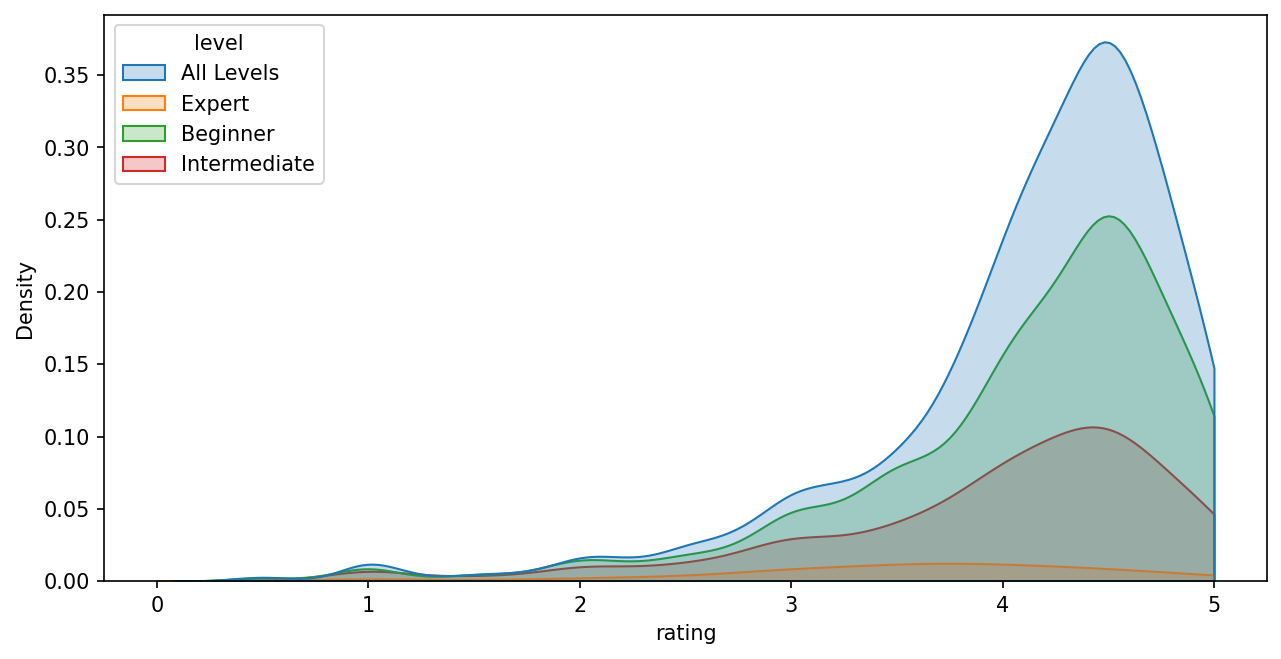

In [180]:
plt.figure(figsize=(10,5),dpi=150)
g = sns.kdeplot(data=data,x="rating",shade=True,hue="level",clip=[0,5])
sns.move_legend(g,loc="upper left")

Expert courses tend to have lower rating all level, beginner, intermediate courses. Most all level, beginner, intermediate courses have rating around 4,5

### Do courses with higher rating have more students?

<AxesSubplot:xlabel='subs', ylabel='rating'>

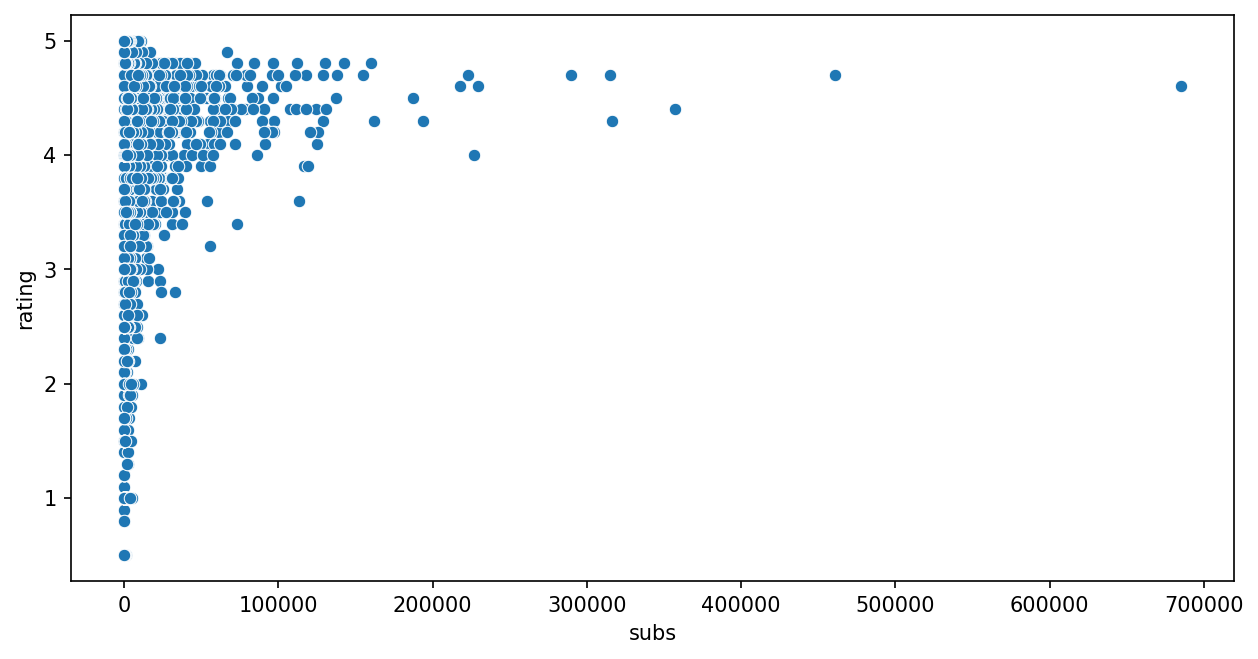

In [184]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(data=data,x="subs",y="rating")

Courses that have rating greater than 3 usually have more students

### Summarize Reviews of courses of choice

In [ ]:
#!pip install bert-extractive-summarizer

In [ ]:
#!pip3 install torch torchvision

In [13]:
from summarizer import Summarizer


In [14]:
model = Summarizer()


Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
body = data.loc[5,"review_content"]
body

"Dated content - XCode 4 vs XCode 8 ... this is a great tutorial for beginners This is a very good basic tutorial for iPhone App development. I hope that you will make an Update covering iOS 6 and storyboard development. I have taken many IOS Development couses and read many IOS development books this course is a great starting point for someone that is just getting started, needs a refresher of the basics, or wanting to learn something new. I have enjoyed the course and the plethora of information that it has. looking forward to more courses like this one. Overall, I've found these tutorials immensely helpful so far, with well organised sections and topics. One small issue is with the sound - the narrators voice is regularly distorted due to a poor mic, or as if the narrator is too close to it. Other than this, I have enjoyed the introductory material. Love the presentation, but the code presented is for iOS 4.3 - with iOS 5.0 and up a lot of it is either superfluous (thanks to Automa

In [16]:
result = model(body)
full = ''.join(result)


In [17]:
print(full)

Dated content - XCode 4 vs XCode 8 ... this is a great tutorial for beginners This is a very good basic tutorial for iPhone App development. Additionally, there is a major disconnect between the XIB files used by the sample app project and the storyboard that is used in the current Xcode. In these days of portability, nothing is worse than a video which is only watchable on a laptop (not even on an ipad).
